### Differential Equation

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}x} = 4,$

$\frac{\mathrm{d}\Psi_2}{\mathrm{d}x} = 2,$

$\Psi_1(0) = 0, \Psi_2(0) = 0, x \in [0, 5]$

In [1]:
from typing import List, Callable
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode

In [2]:
PSI_0 = np.array([0, 0])


def derivative(x, psi) -> np.ndarray:
    """Example #4 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_1_dot = np.full((x.size), 4)
    psi_2_dot = np.full((x.size), 2)
    return np.array([psi_1_dot, psi_2_dot])


def analytical_solution(x):
    """Analytical solution to example #4.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    psi_1 = 4 * x
    psi_2 = 2 * x

    return np.array([psi_1, psi_2])


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 2.337226421390081
Iteration:  1
 2.300313847321197
Iteration:  2
 2.2628593423457315
Iteration:  3
 2.224818114517589
Iteration:  4
 2.1861571444365437
Iteration:  5
 2.1468340050268377
Iteration:  6
 2.1068067882640436
Iteration:  7
 2.0660360202319286
Iteration:  8
 2.0244818034668137
Iteration:  9
 1.982103860843022
Iteration:  10
 1.938862148613574
Iteration:  11
 1.8947175540038295
Iteration:  12
 1.8496325877350477
Iteration:  13
 1.80357201347449
Iteration:  14
 1.7565033135015944
Iteration:  15
 1.7083968453099623
Iteration:  16
 1.6592255659210435
Iteration:  17
 1.60896432330492
Iteration:  18
 1.5575890031681532
Iteration:  19
 1.5050763236097278
Iteration:  20
 1.4514054293740568
Iteration:  21
 1.3965616022332836
Iteration:  22
 1.3405399436532774
Iteration:  23
 1.2833453330119595
Iteration:  24
 1.2249877900947581
Iteration:  25
 1.1654778567902417
Iteration:  26
 1.1048280098047814
Iteration:  27
 1.043059993393424
Iteration:  28
 0.9802102042553217
Itera

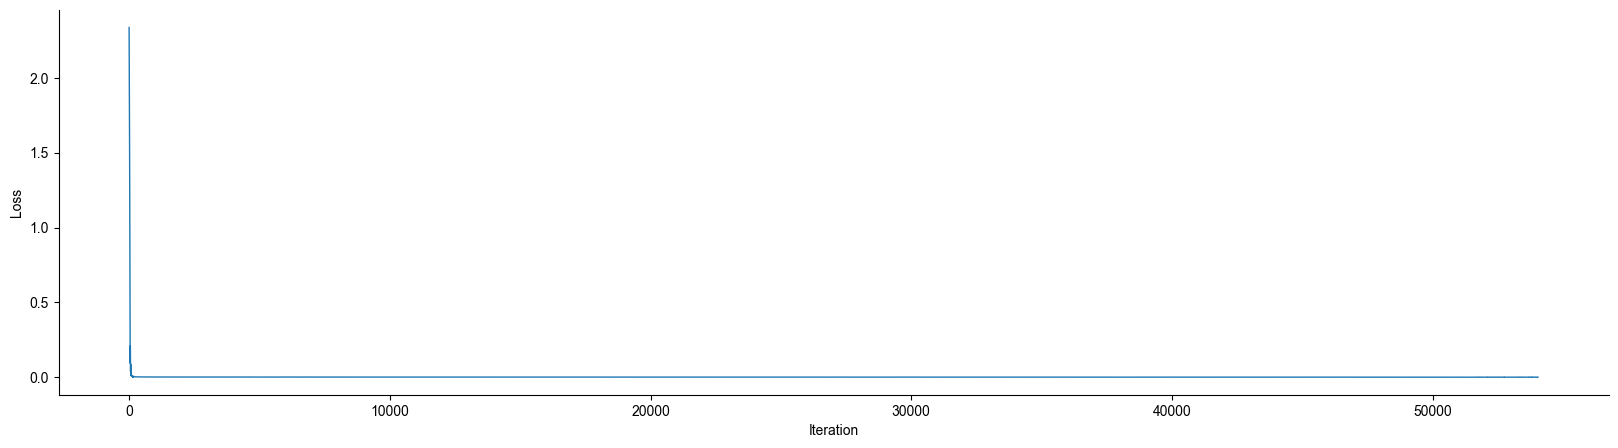

In [4]:
def train():
    t = np.arange(0, 5, 0.2)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights_1 = init_weights(1, hidden_sizes, 1)
    nn_weights_2 = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights_1, nn_weights_2],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=100000,
        step_size=0.001,
        threshold=0.001,
    )

    return [nn_weights_1, nn_weights_2], activation_fns


weights_list, activation_fns = train()

### Evaluating Results

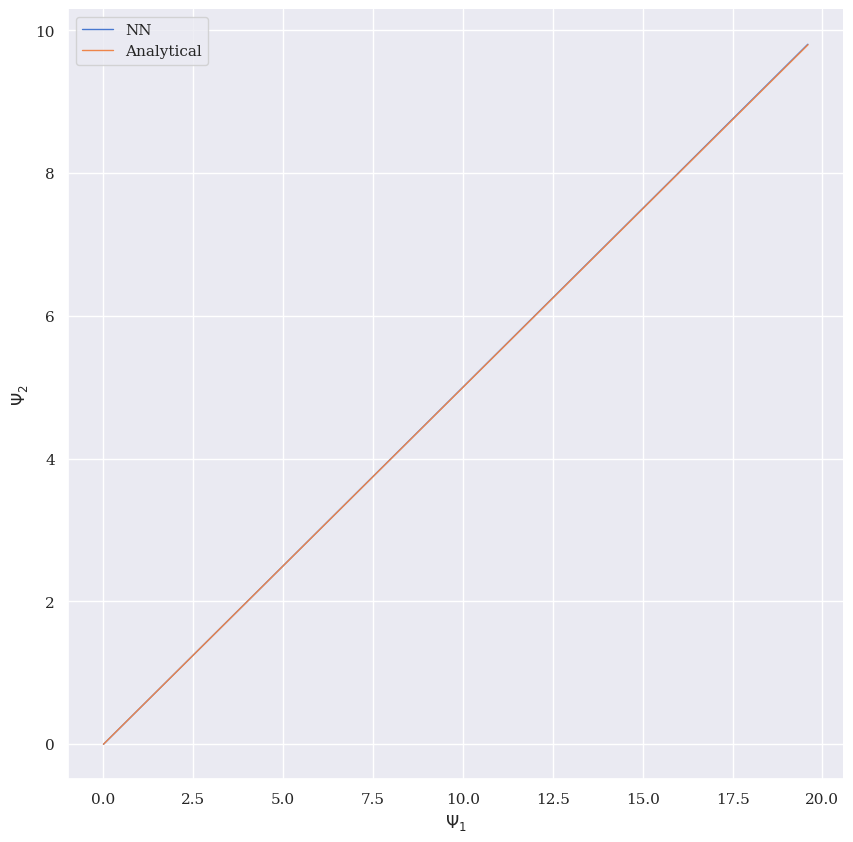

In [5]:
t = np.arange(0, 5, 0.1)
res = trial_solution(t, weights_list, activation_fns)
an_sol = analytical_solution(t)

plot_system_ode(res, an_sol)